<style>
  .large-text {
    font-size: 20px;
  }
</style>

<div class="large-text">
  - Calvin Bootsman  <br>
  - Fotios Koutkos  <br>
  - Rianne Drijver
</div>


Final belief distribution: [0.00000000e+00 0.00000000e+00 0.00000000e+00 5.45390447e-08
 1.30893707e-06 1.50527763e-05 1.10387027e-04 5.79531889e-04
 2.31812756e-03 7.34073726e-03 1.88761815e-02 4.01118858e-02
 7.13100191e-02 1.11729123e-01 1.62986226e-01 2.07517138e-01
 1.98842376e-01 1.25555862e-01 4.55553733e-02 7.15061415e-03]


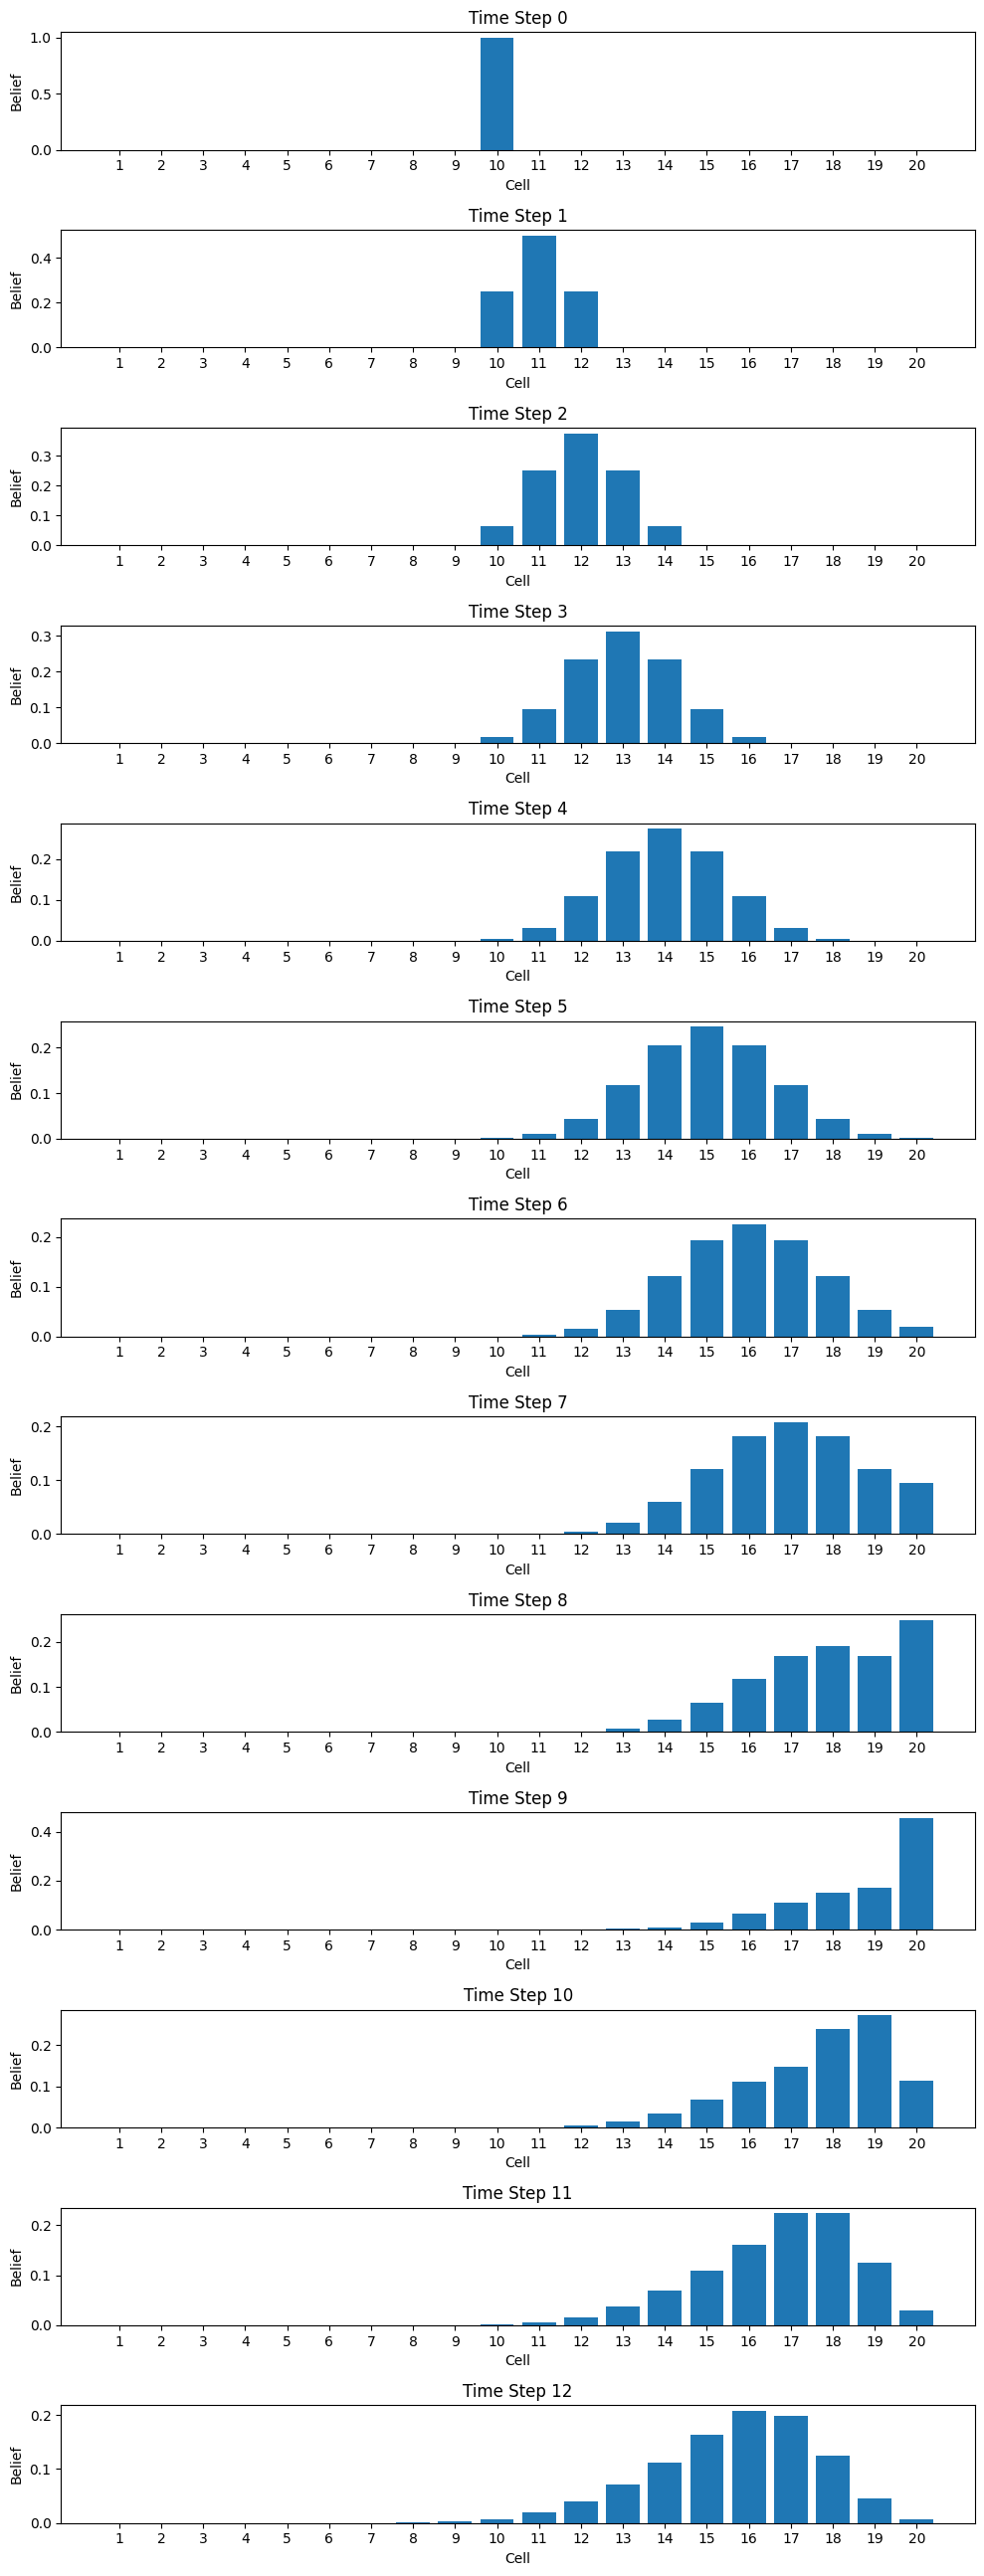

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def initialize_belief(cells, initial_position):
    belief = np.zeros(cells)
    belief[initial_position] = 1.0
    return belief

def move_forward(belief):
    cells = len(belief)
    new_belief = np.zeros(cells)

    for i in range(cells):
        if i == cells - 1:
            new_belief[i] += belief[i]
        if i == cells - 2:
            new_belief[i + 1] += 0.75 * belief[i]  # Move to the last cell 
            new_belief[i] += 0.25 * belief[i]  # Stay in same cell
        else:
            new_belief[i] += 0.25 * belief[i]
            if i + 1 < cells:
                new_belief[i + 1] += 0.50 * belief[i]  # Move to next cell
            if i + 2 < cells:
                new_belief[i + 2] += 0.25 * belief[i]  # Move two cells forward
    return new_belief / new_belief.sum()


def move_backwards(belief):
    cells = len(belief)
    new_belief = np.zeros(cells)
    for i in range(cells):
        if i == 0:  # Edge Case: First cell
            new_belief[i] += belief[i]  # 100% stay in the first cell
        elif i == 1:  # Edge Case: Second cell
            new_belief[i] += 0.25 * belief[i]  # 25% stay in the same cell
            new_belief[i - 1] += 0.75 * belief[i]  # 75% move to the first cell
        else:
            new_belief[i] += 0.25 * belief[i]  # 25% stay in the same cell
            new_belief[i - 1] += 0.50 * belief[i]  # 50% move to the previous cell
            if i - 2 >= 0:
                new_belief[i - 2] += 0.25 * belief[i]  # 25% move two cells back
    return new_belief / new_belief.sum()

# Initialize parameters
cells = 20  # 20 cells
initial_position = 9  # 10th cell (0-indexed)

# Initialize belief
belief = initialize_belief(cells, initial_position)
belief_list = []
belief_list.append(belief)

# Perform 9 forward movements
for _ in range(9):
    belief = move_forward(belief)
    belief_list.append(belief)

# Perform 3 backward movements
for _ in range(3):
    belief = move_backwards(belief)
    belief_list.append(belief)

# Display final belief distribution
print("Final belief distribution:", belief)

belief_table = pd.DataFrame(belief_list)

# Add column and row labels
belief_table.columns = [f'Cell {i+1}' for i in range(len(belief_list[0]))]
belief_table.index = [f'Time Step {i}' for i in range(len(belief_list))]

# Plot belief distribution for each time step with x-axis from 1 to 20
fig, axes = plt.subplots(len(belief_list), 1, figsize=(10, 2 * len(belief_list)))

for i, ax in enumerate(axes):
    ax.bar(range(1, cells + 1), belief_list[i])
    ax.set_title(f'Time Step {i}')
    ax.set_xlabel('Cell')
    ax.set_ylabel('Belief')
    ax.set_xticks(range(1, cells + 1))  # Set x-ticks from 1 to 20

plt.tight_layout()
plt.show()


- ### Belief Table

In [2]:
display(belief_table)

,Cell 1,Cell 2,Cell 3,Cell 4,Cell 5,Cell 6,Cell 7,Cell 8,Cell 9,Cell 10,Cell 11,Cell 12,Cell 13,Cell 14,Cell 15,Cell 16,Cell 17,Cell 18,Cell 19,Cell 20
Time Step 0,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Time Step 1,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.250000,0.500000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Time Step 2,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.062500,0.250000,0.375000,0.250000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Time Step 3,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.015625,0.093750,0.234375,0.312500,0.234375,0.093750,0.015625,0.000000,0.000000,0.000000,0.000000
Time Step 4,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.003906,0.031250,0.109375,0.218750,0.273438,0.218750,0.109375,0.031250,0.003906,0.000000,0.000000
Time Step 5,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000977,0.009766,0.043945,0.117188,0.205078,0.246094,0.205078,0.117188,0.043945,0.009766,0.000977
Time Step 6,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000244,0.002929,0.016109,0.053698,0.120820,0.193312,0.225531,0.193312,0.120820,0.053698,0.019526
Time Step 7,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000061,0.000850,0.005526,0.022103,0.060785,0.121569,0.182354,0.208404,0.182354,0.121569,0.094426
Time Step 8,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000015,0.000237,0.001780,0.008305,0.026992,0.064781,0.118765,0.169665,0.190873,0.169665,0.248921
Time Step 9,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000003,0.000063,0.000534,0.002848,0.010681,0.029907,0.064798,0.111082,0.152737,0.169708,0.457639


# Simulation

[0.00000000e+00 0.00000000e+00 0.00000000e+00 5.35000000e-08
 1.42500000e-06 1.64670000e-05 1.20997000e-04 6.33740000e-04
 2.53220000e-03 8.02262050e-03 2.06310365e-02 4.38346895e-02
 7.79380660e-02 1.20654009e-01 1.69403804e-01 2.05020245e-01
 1.88301160e-01 1.15452891e-01 4.10713175e-02 6.36527950e-03]


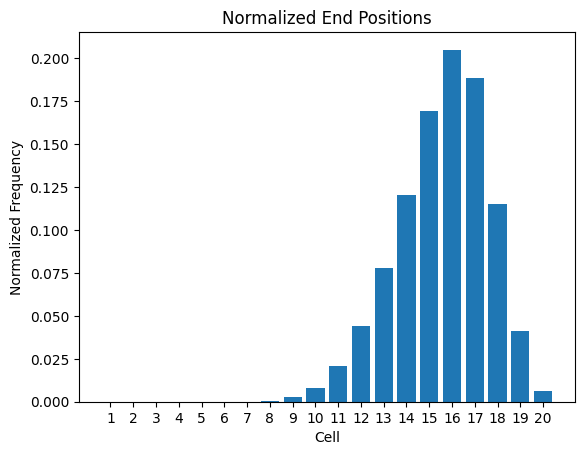

In [21]:
import cupy as cp
import matplotlib.pyplot as plt

def simulate_vectorized_incremental(num_simulations, num_forward, num_backward, grid_size=20, chunk_size=100_000_000):
    total_counts = cp.zeros(grid_size, dtype=cp.int32)  # To accumulate counts

    num_chunks = num_simulations // chunk_size
    for chunk in range(num_chunks):
        # Simulate a chunk of simulations
        positions = cp.full(chunk_size, 9, dtype=cp.int32)  # Start all at position 9

        # Forward movements
        for _ in range(num_forward):
            moves = cp.random.choice(cp.array([0, 1, 2]), size=chunk_size, p=cp.array([0.25, 0.50, 0.25]))
            positions = cp.clip(positions + moves, 0, grid_size - 1)

        # Backward movements
        for _ in range(num_backward):
            moves = cp.random.choice(cp.array([0, -1, -2]), size=chunk_size, p=cp.array([0.25, 0.50, 0.25]))
            positions = cp.clip(positions + moves, 0, grid_size - 1)

        # Use cp.add.at for in-place accumulation
        cp.add.at(total_counts, positions, 1)

    # Normalize the final count
    normalized_end_positions = total_counts / total_counts.sum()
    return normalized_end_positions

# Run the simulation with 2 billion * 100 million simulations
num_simulations = 2_000_000_000  
num_forward = 9
num_backward = 3
grid_size = 20

# This will accumulate counts in place without requiring chunked arrays
normalized_end_positions = simulate_vectorized_incremental(num_simulations, num_forward, num_backward, grid_size)

# Transfer to CPU for further analysis or plotting
normalized_end_positions = cp.asnumpy(normalized_end_positions)

print(normalized_end_positions)
# Plot the results
plt.bar(range(1, grid_size + 1), normalized_end_positions)
plt.xlabel('Cell')
plt.ylabel('Normalized Frequency')
plt.title('Normalized End Positions')
plt.xticks(range(1, grid_size + 1))
plt.show()